# Gráfico da Função Restrigin    

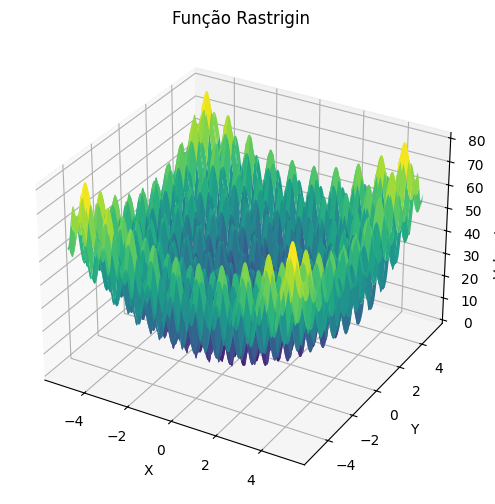

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função Rastrigin
def rastrigin(X, Y):
    A = 10
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

# Gera valores de X e Y no intervalo [-5.12, 5.12]
x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)

X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

# Criação do gráfico 3D da função Rastrigin
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Adicionando títulos e rótulos
ax.set_title("Função Rastrigin")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Valor da Função")

plt.show()


# Benchmark 


In [2]:
import random
import numpy as np
import time
from deap import base, creator, tools, algorithms

# Configuração da função de benchmark (Rastrigin)
def rastrigin(individual):
    A = 10
    return A * len(individual) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in individual]),

# Função para rodar o algoritmo genético básico
def run_ga(pop_size, cx_prob, mut_prob, ngen, elitism=False):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", random.uniform, -5.12, 5.12)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", rastrigin)

    pop = toolbox.population(n=pop_size)

    hof = tools.HallOfFame(1, similar=np.array_equal)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    if elitism:
        alg = algorithms.eaMuPlusLambda
        lambda_ = int(pop_size * 1.1)  # Número de filhos para elitismo
        start_time = time.time()
        algorithms.eaMuPlusLambda(pop, toolbox, mu=pop_size, lambda_=lambda_, cxpb=cx_prob, mutpb=mut_prob, ngen=ngen,
                                  stats=stats, halloffame=hof, verbose=False)
        end_time = time.time()
    else:
        start_time = time.time()
        algorithms.eaSimple(pop, toolbox, cxpb=cx_prob, mutpb=mut_prob, ngen=ngen, 
                            stats=stats, halloffame=hof, verbose=False)
        end_time = time.time()

    return hof[0], hof[0].fitness.values[0], end_time - start_time

# Parâmetros do benchmark
pop_size = 100
cx_prob = 0.7
mut_prob = 0.2
ngen = 50

# Executando GA simples
best_ind_simple, best_fitness_simple, exec_time_simple = run_ga(pop_size, cx_prob, mut_prob, ngen, elitism=False)

# Executando GA com elitismo
best_ind_elitism, best_fitness_elitism, exec_time_elitism = run_ga(pop_size, cx_prob, mut_prob, ngen, elitism=True)

# Resultados do benchmark
print("\n=== Algoritmo Genético Simples ===")
print("Melhor Individuo: ", best_ind_simple)
print("Melhor Fitness: ", best_fitness_simple)
print("Tempo de Execução: %.2f segundos" % exec_time_simple)

print("\n=== Algoritmo Genético com Elitismo ===")
print("Melhor Individuo: ", best_ind_elitism)
print("Melhor Fitness: ", best_fitness_elitism)
print("Tempo de Execução: %.2f segundos" % exec_time_elitism)

# Comparação
print("\n=== Comparação ===")
print(f"Fitness Simples: {best_fitness_simple}, Fitness Elitismo: {best_fitness_elitism}")
print(f"Tempo Simples: {exec_time_simple:.2f} s, Tempo Elitismo: {exec_time_elitism:.2f} s")


c:\Users\fabio\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\fabio\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



=== Algoritmo Genético Simples ===
Melhor Individuo:  [0.9941164346891236, 0.0008557218955554452, -0.9923830771618981, 0.9781509826999695, -0.015776712280821704, 0.0315131543341694, -0.9584211830992142, -0.9778240510706828, -0.008980278292931097, 0.02532091779748889]
Melhor Fitness:  5.74196949254484
Tempo de Execução: 0.17 segundos

=== Algoritmo Genético com Elitismo ===
Melhor Individuo:  [0.9883397875350917, 0.016806915217418814, -0.00658139743721983, 0.978814980382658, 1.0195380693325904, -0.9936803157926714, -1.0270098100743104, -0.00044960613645016884, -0.021618882218352304, -0.9545053158745361]
Melhor Fitness:  6.832649138779075
Tempo de Execução: 0.23 segundos

=== Comparação ===
Fitness Simples: 5.74196949254484, Fitness Elitismo: 6.832649138779075
Tempo Simples: 0.17 s, Tempo Elitismo: 0.23 s
